In [3]:
import numpy as np
import seaborn as sns

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [4]:
from matplotlib import pyplot as plt


def plot_2d_cluster(X, model, columns = ['X', 'Y']):
    means = model.cluster_centers_
    ax = sns.scatterplot(X[columns[0]], X[columns[1]], c=vectorizer(model.labels_))
    ax = sns.scatterplot(means[:, 0], means[:, 1], ec='red', legend=False, ax=ax)
    plt.show()

In [5]:
import pandas as pd

adult_dataset = pd.read_csv('./data/adult.csv', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
adult_dataset.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [6]:
adult_dataset_numeric = adult_dataset[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [7]:
adult_dataset_numeric.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [8]:
adult_dataset_numeric.isna().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

<AxesSubplot:>

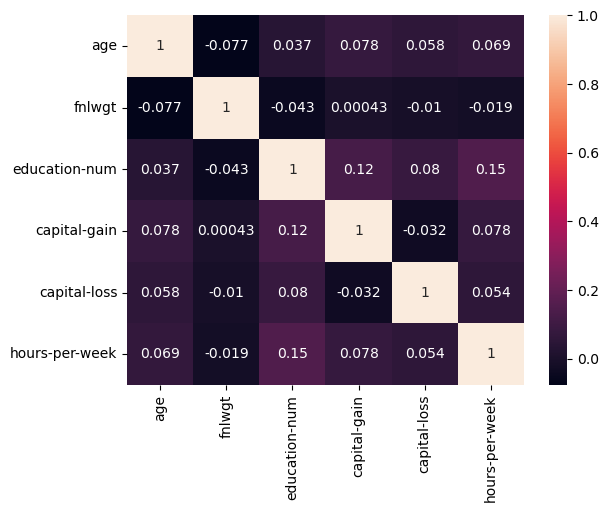

In [9]:
sns.heatmap(adult_dataset_numeric.corr(), annot=True)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


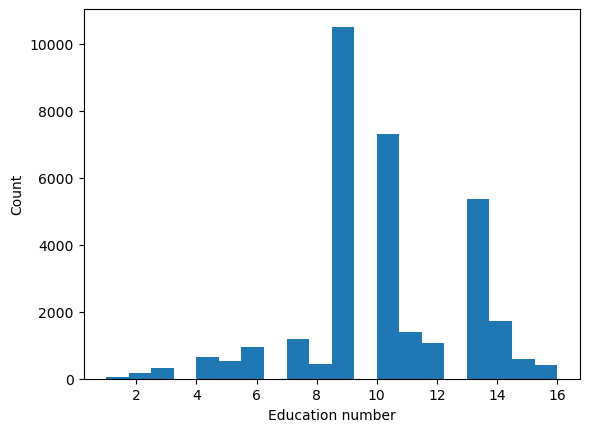

In [10]:
sns.distplot(
    adult_dataset_numeric['education-num'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Education number', ylabel='Count');

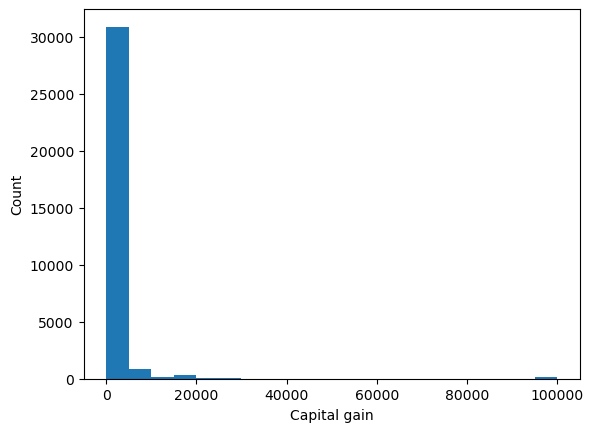

In [11]:
sns.distplot(
    adult_dataset_numeric['capital-gain'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Capital gain', ylabel='Count');

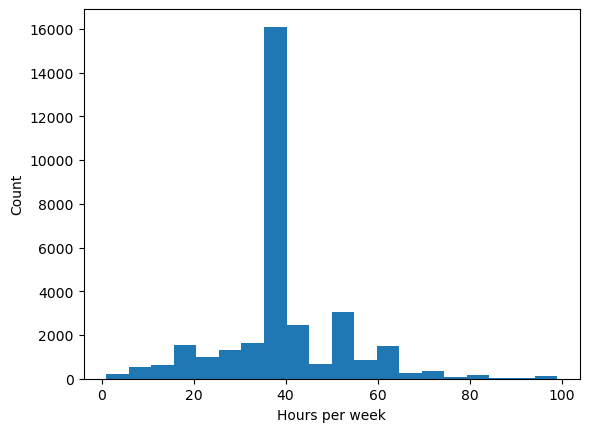

In [12]:
sns.distplot(
    adult_dataset_numeric['hours-per-week'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Hours per week', ylabel='Count');

- There are no nan / null values in the dataset
- There is a slight collelation (0.12) between education-num and capital-gain. This is expected as people with higher education tend to have higher income and hence higher capital-gain.
- There is a slight correlation (0.15) between education-num and hours-per-week. This is expected as people with higher education tend to work more hours per week.
- Capital gain is mostly centered around the average / median income as expected.
- hours per week is also as expected peaking around 40 hours per week

Based on above observations, we are be-able to start with a scatteplot to display the education-num and capital-gain. As these have the highest correlations.

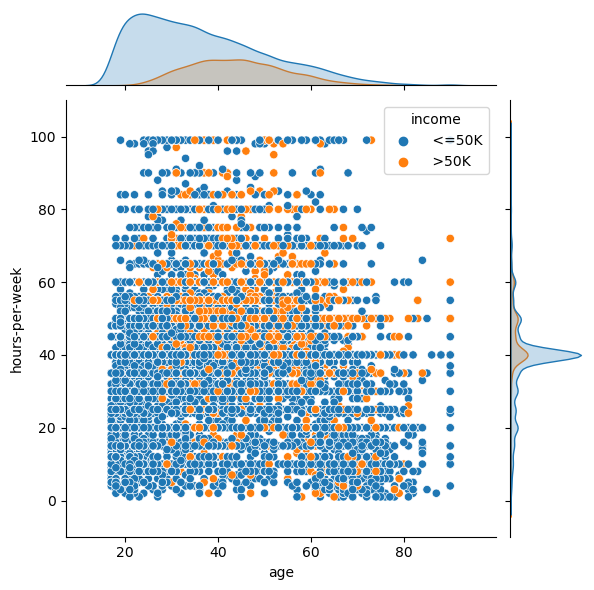

In [13]:
from sklearn.discriminant_analysis import StandardScaler


#adult_dataset_numeric_scaled = pd.DataFrame(StandardScaler().fit_transform(adult_dataset_numeric), columns=adult_dataset_numeric.columns)
sns.jointplot(x=adult_dataset['age'], y=adult_dataset['hours-per-week'], hue=adult_dataset['income']);


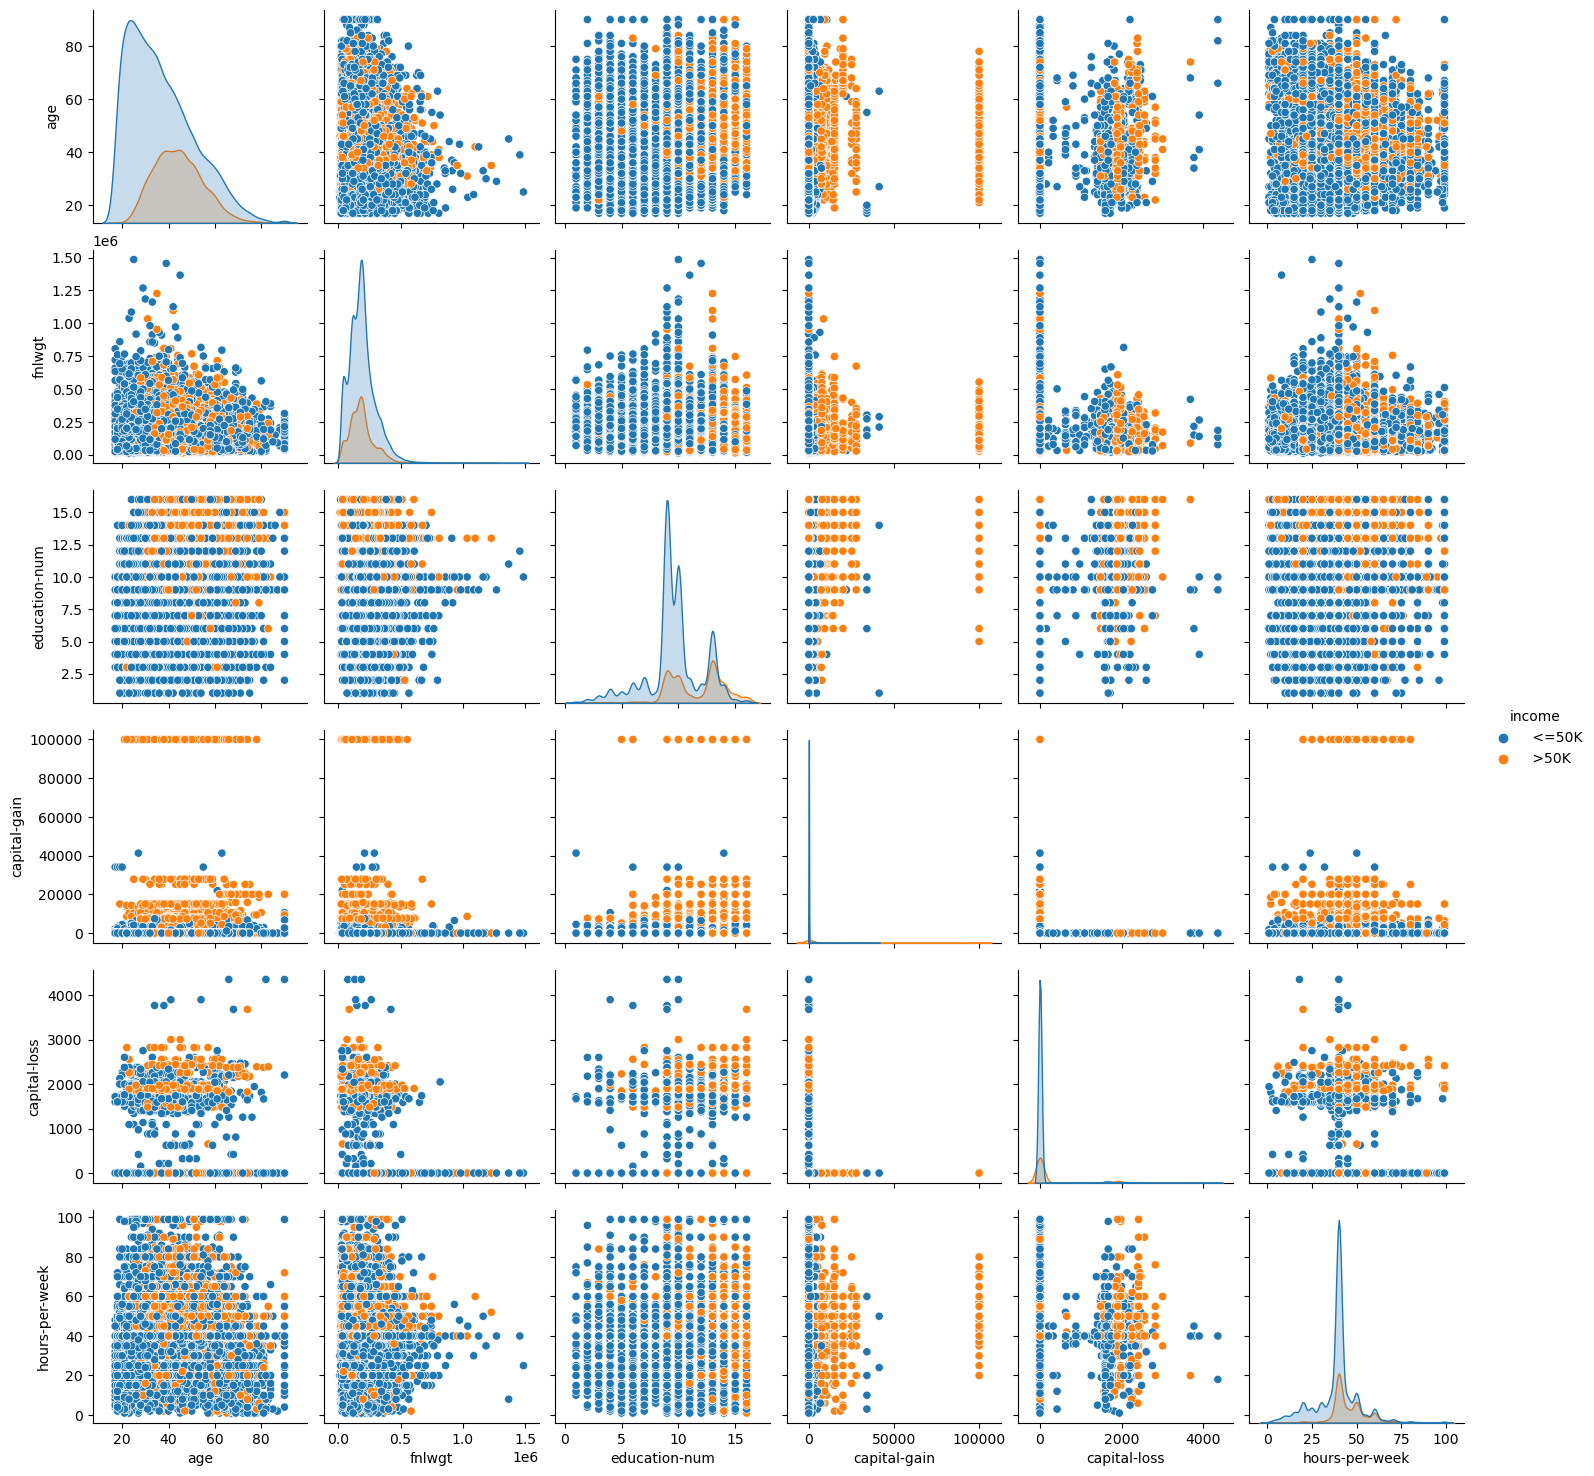

In [14]:
from sklearn.preprocessing import MinMaxScaler


adult_dataset_scaled = pd.DataFrame(adult_dataset_numeric, columns=adult_dataset_numeric.columns)
adult_dataset_scaled['income'] = adult_dataset['income']
sns.pairplot(adult_dataset_scaled, hue='income')

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

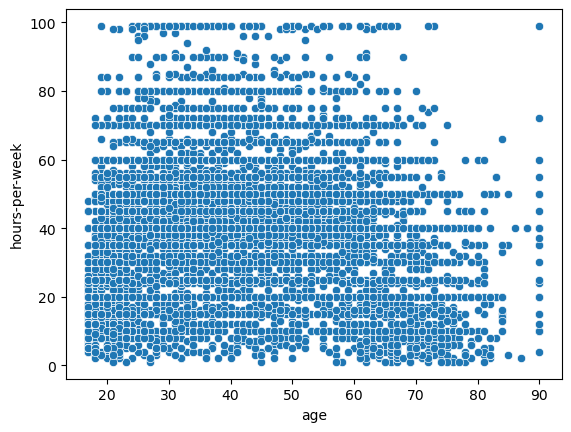

In [17]:
data_set_selection = adult_dataset_numeric[['age', 'hours-per-week']]
sns.scatterplot(x=data_set_selection['age'], y=data_set_selection['hours-per-week'])

/tmp/ipykernel_59362/3427637813.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)


Text(0.5, 0, 'Hours per week')

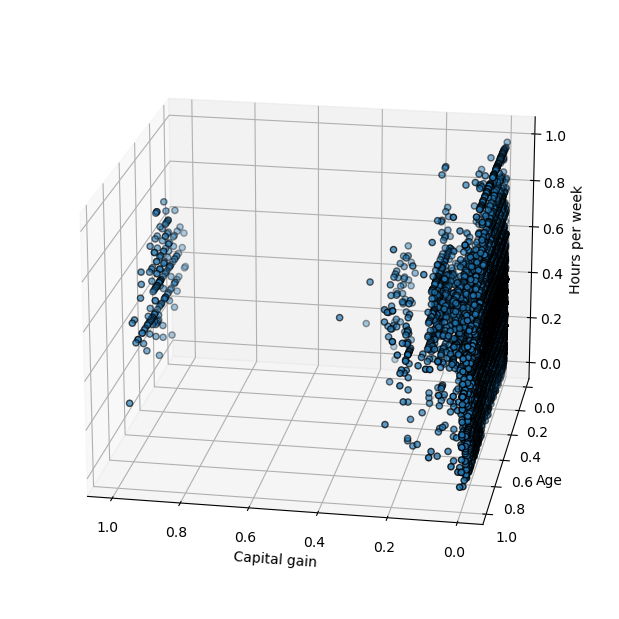

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
analysis_data = adult_dataset_numeric[['capital-gain', 'age', 'hours-per-week']]
min_max_scaled_adult = pd.DataFrame(MinMaxScaler().fit_transform(analysis_data), columns=analysis_data.columns)
ax.scatter(min_max_scaled_adult['capital-gain'], min_max_scaled_adult['age'], min_max_scaled_adult['hours-per-week'], edgecolor='k')

ax.set_xlabel('Capital gain')
ax.set_ylabel('Age')
ax.set_zlabel('Hours per week')

## Seeds dataset

In [18]:
seeds_dataset = pd.read_csv('./data/Seed_Data.csv', header=None, skiprows=1, names=['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class'])
seeds_dataset.head()

area  perimeter  compactness  length of kernel  width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   asymmetry coefficient  length of kernel groove  class  
0                  2.221                    5.220      0  
1                  1.018                    4.956      0  
2                  2.699                    4.825      0  
3                  2.259                    4.805      0  
4                  1.355                    5.175      0

In [19]:
seeds_dataset.shape

(210, 8)

In [20]:
seeds_dataset_numeric = seeds_dataset[['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove']]
seeds_dataset_numeric.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
dtype: int64

In [21]:
seeds_dataset_numeric.isna().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
dtype: int64

<AxesSubplot:>

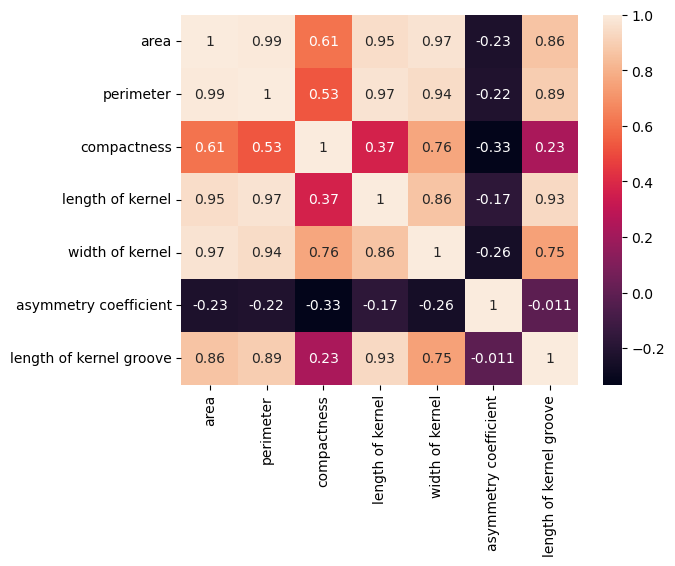

In [22]:
sns.heatmap(seeds_dataset_numeric.corr(), annot=True)

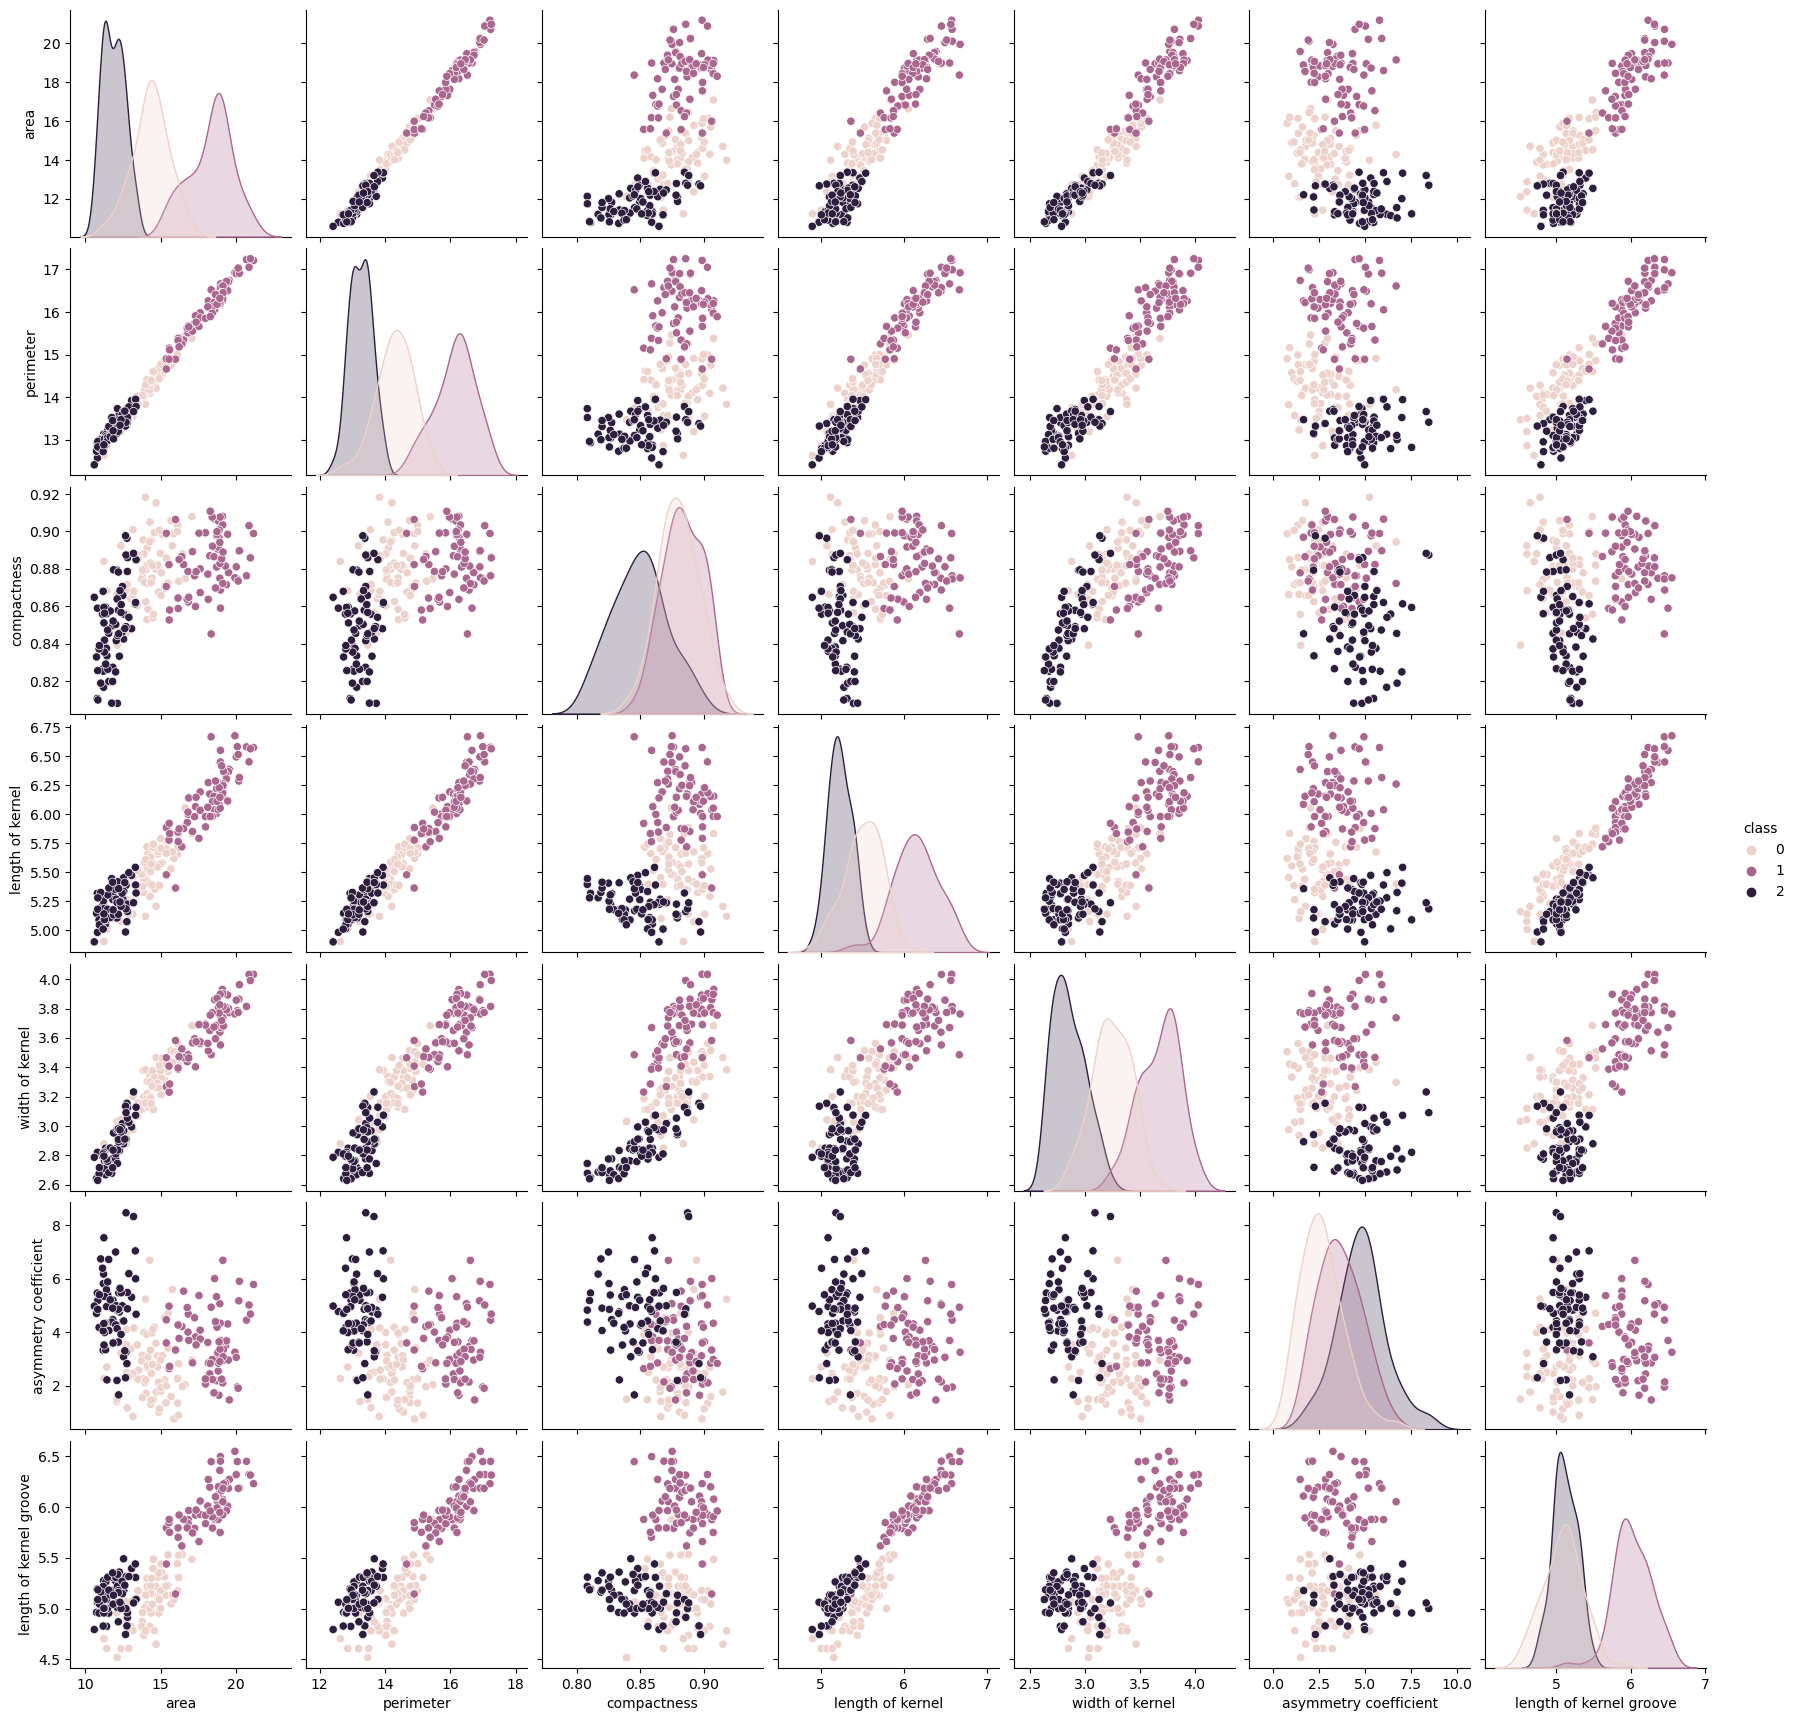

In [23]:
sns.pairplot(seeds_dataset, hue='class')

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


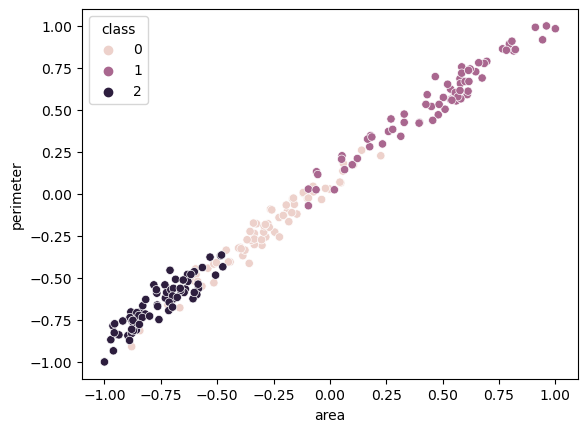

In [40]:
seeds_dataset_numeric_scaled = pd.DataFrame(MinMaxScaler(feature_range=[-1, 1]).fit_transform(seeds_dataset_numeric), columns=seeds_dataset_numeric.columns)
sns.scatterplot(x=seeds_dataset_numeric_scaled['area'], y=seeds_dataset_numeric_scaled['perimeter'], hue=seeds_dataset['class']);

/tmp/ipykernel_59362/3805907415.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)


Text(0.5, 0, 'Weight')

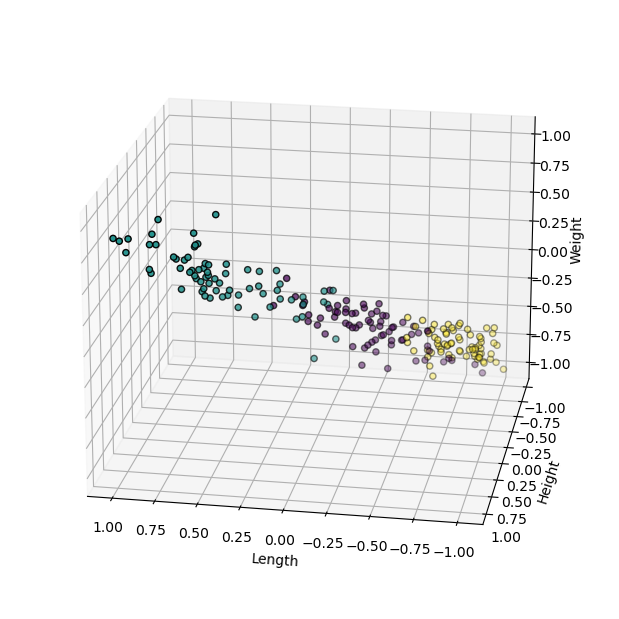

In [41]:

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
ax.scatter(seeds_dataset_numeric_scaled['area'], seeds_dataset_numeric_scaled['perimeter'], seeds_dataset_numeric_scaled['length of kernel'],c=seeds_dataset['class'], edgecolor='k')

ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')


In [45]:
data_for_rq1 = seeds_dataset[['area', 'perimeter', 'class']]
data_for_rq1.head()

area  perimeter  class
0  15.26      14.84      0
1  14.88      14.57      0
2  14.29      14.09      0
3  13.84      13.94      0
4  16.14      14.99      0

In [46]:
data_for_rq1.to_csv('./data/seeds-dataset/rq1.csv')

In [47]:
data_for_rq2 = seeds_dataset[['area', 'perimeter', 'length of kernel', 'class']]
data_for_rq2.head()

area  perimeter  length of kernel  class
0  15.26      14.84             5.763      0
1  14.88      14.57             5.554      0
2  14.29      14.09             5.291      0
3  13.84      13.94             5.324      0
4  16.14      14.99             5.658      0

In [30]:
data_for_rq2.to_csv('./data/seeds-dataset/rq2.csv')

## Diabetes

In [31]:
diabeters_dataset = pd.read_csv('./data/ObesityDataSet_raw_and_data_sinthetic.csv')
diabeters_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [32]:
diabeters_dataset_numeric = diabeters_dataset[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']]
diabeters_dataset_numeric.isnull().sum()

Age           0
Height        0
Weight        0
FCVC          0
NCP           0
CH2O          0
FAF           0
TUE           0
CALC          0
MTRANS        0
NObeyesdad    0
dtype: int64

In [33]:
diabeters_dataset_numeric.isna().sum()

Age           0
Height        0
Weight        0
FCVC          0
NCP           0
CH2O          0
FAF           0
TUE           0
CALC          0
MTRANS        0
NObeyesdad    0
dtype: int64

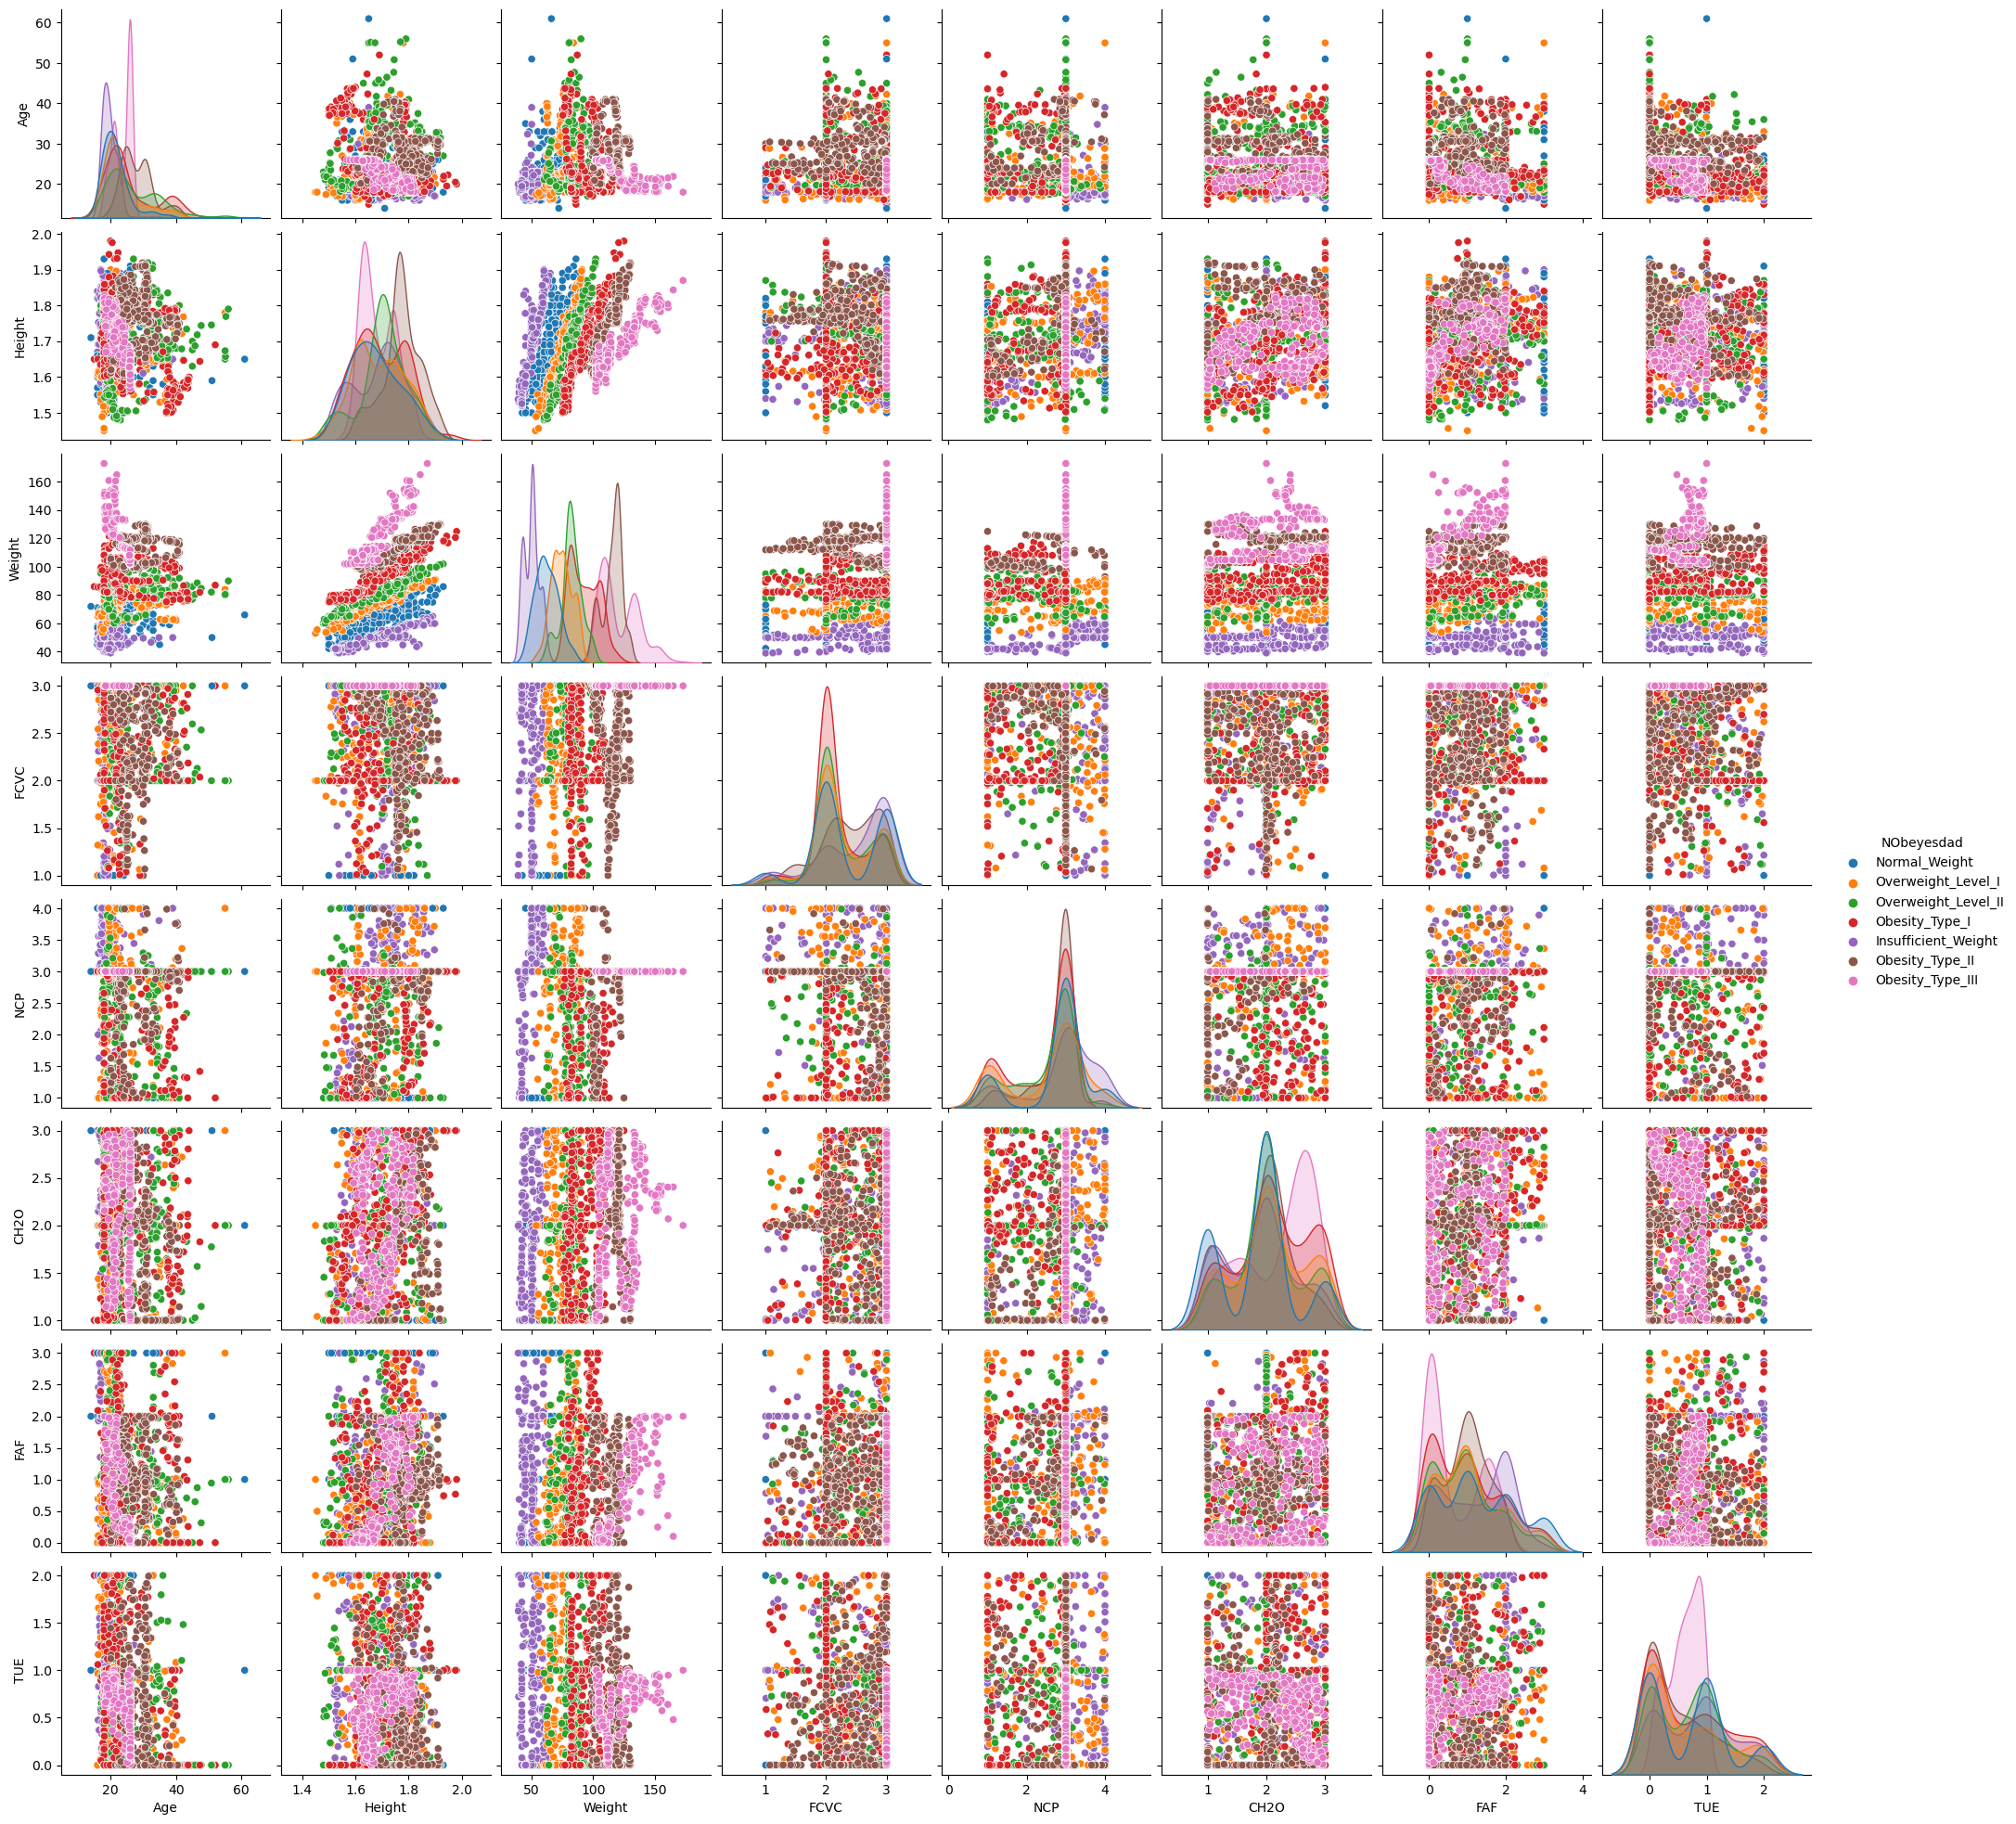

In [34]:
sns.pairplot(diabeters_dataset_numeric, hue='NObeyesdad')

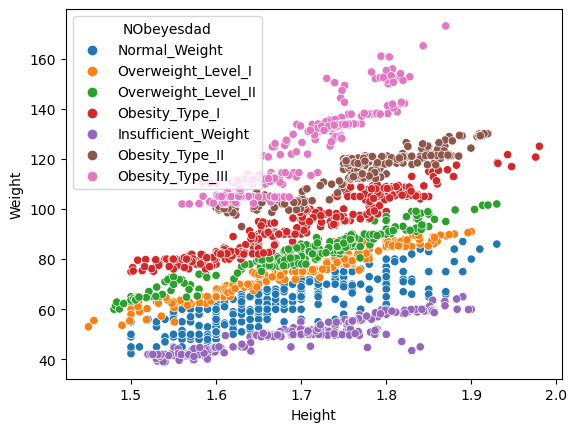

In [35]:
twod_cluster_columns = ['Height', 'Weight']
twod_cluster_columns_data = diabeters_dataset_numeric[twod_cluster_columns]
sns.scatterplot(x=twod_cluster_columns_data['Height'], y=twod_cluster_columns_data['Weight'], hue=diabeters_dataset_numeric['NObeyesdad']);

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categories = le.fit_transform(diabeters_dataset_numeric['NObeyesdad'])
categories

array([1, 1, 1, ..., 4, 4, 4])

/tmp/ipykernel_59362/2245836783.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)


Text(0.5, 0, 'Age')

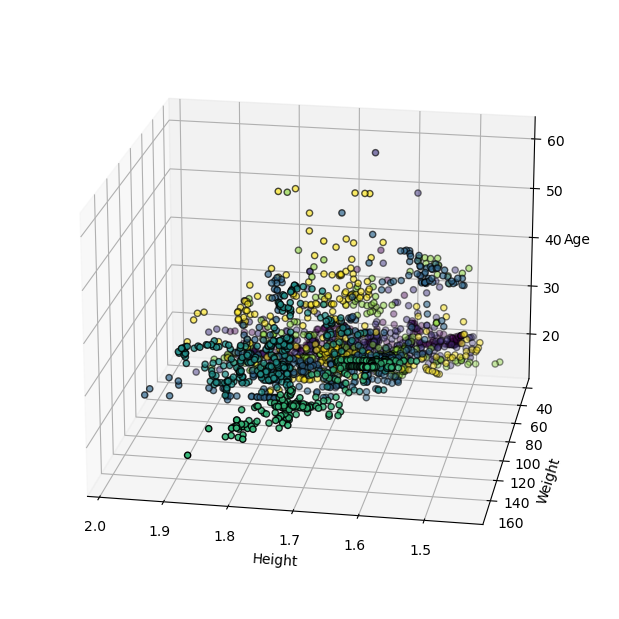

In [37]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
ax.scatter(diabeters_dataset_numeric['Height'], diabeters_dataset_numeric['Weight'], diabeters_dataset_numeric['Age'], c=categories, edgecolor='k')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Age')


## Breast cancer

In [38]:
adult_dataset = pd.read_csv('./data/adult.csv')
adult_dataset.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [39]:
breastcancer_dataset.info()

NameError: name 'breastcancer_dataset' is not defined